In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv('consolidated_contracts.csv')

In [4]:
contract_lengths = df['announcement'].str.len()

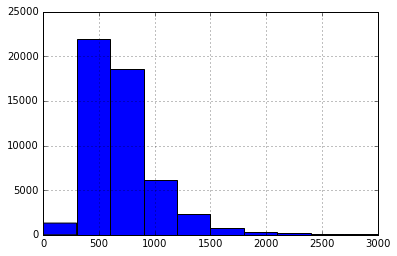

In [5]:
# Setting a range here because there is one extremely high value (40000+) that throws the graph off
contract_lengths.hist(range=[0, 3000], bins=10)

In [109]:
# Find the overly length announcements
# Find announcements that mention "contracting activity" multiple times (indicates multiple entires usually)
suspect_announcements = df[(df['announcement'].str.len() > 2500) & 
                          (df['announcement'].str.count('contracting activity', flags=re.IGNORECASE) > 1)]

In [110]:
print(suspect_announcements)

                     date                                       announcement
27848     August 09, 2006  CONTRACTS NAVY Harris Corp., RF Communications...
27865     August 11, 2006  CONTRACTS AIR FORCE Rockwell Collins Inc., Ced...
27866     August 14, 2006  CONTRACTS AIR FORCE Aerospace Testing Alliance...
27867     August 15, 2006  CONTRACTS ARMY General Dynamics, St. Petersbur...
27868     August 16, 2006  CONTRACTS MISSILE DEFENSE AGENCY Raytheon Miss...
27869     August 18, 2006  CONTRACTS DEFENSE LOGISTICS AGENCY Science App...
27870     August 21, 2006  CONTRACTS DEFENSE INFORMATION SYSTEMS AGENCY (...
27871  September 06, 2006  CONTRACTS ARMY GM GDLS Defense Group L.L.C. (J...
27872  September 06, 2006  Spindler Construction Corp.*, Logan, Utah, was...
27873  September 07, 2006  CONTRACTS DEFENSE LOGISTICS AGENCY Valero Mark...
27874  September 08, 2006  Lear Siegler Logistics International Inc., Gai...
27880  September 11, 2006  GM GDLS Defense Group L.L.C. (Joint Venture), ...

In [111]:
# Export to CSV for manual editing and splitting of long announcements that are probably repeated
suspect_announcements.to_csv('suspect_announcements.csv')